Calibrating Sidaway Lee microarray data  (http://www.genomebiology.com/2014/15/3/R45) with absolute units from Piques  

Reanalysis of Piques data from Molecular Systems biology http://msb.embopress.org/content/5/1/314

In [46]:
from SloppyCell.ReactionNetworks import *
pU2017_1 = Utility.load('models/params_sets/U2017.1_to_timet_shape_lhycca1_period_const_cLUX/params_19.bp')
pU2017_2 = Utility.load('models/params_sets/U2017.2_to_timet_shape_lhycca1_period_const_cLUX/params_26.bp')
sfU2017_1 = Utility.load('models/params_sets/U2017.1_to_timet_shape_lhycca1_period_const_cLUX/sftoTimet_data.bp')
sfU2017_2 = Utility.load('models/params_sets/U2017.2_to_timet_shape_lhycca1_period_const_cLUX/sftoTimet_data.bp')





In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd
import seaborn
import scipy.stats

In [5]:
from scipy.stats import linregress, norm

## Experimental conditions Piques

Arabidopsis thaliana ecotype Col‐0 was grown in GS90 soil under 12‐h light–dark cycle at a light intensity of 150 μmol m−2 s−1 and 20°C for 5 weeks (Thimm et al, 2004), at which time flowering had not commenced. The samples were immediately frozen under ambient irradiance in liquid nitrogen. The samples were powdered using Labman Automation (Stocksley, UK) and stored at −80°C until use

In [8]:
piques = pd.read_excel('inline-supplementary-material-3Compact.xls', sheetname=0) 
piques.head()

,Enzyme/Protein/Control Names and Gene Family Isoforms,Locus Identifier,ORF Length (bp),Protein Length (aa),Unfractionated total RNA_dark_mean (mol gFW-1),Unfractionated total RNA_dark_sd (mol gFW-1),Unfractionated total RNA_light_mean (mol gFW-1),Unfractionated total RNA_light_sd (mol gFW-1),transcript level_NPS_dark_mean (copy.g-1 FW),transcript level_NPS_dark_sd,...,transcript level_LPS_light_sd,Ribosome Number according to Brandt et al. (2009),SPS_dark Estimated Translation Rate for Individual Gene Family Members (mol.h-1.g-1 FW),LPS_dark Estimated Translation Rate for Individual Gene Family Members (mol.h-1.g-1 FW),PS (SPS+LPS)_dark Estimated Translation Rate for Individual Gene Family Members (mol.h-1.g-1 FW),SPS_light Estimated Translation Rate for Individual Gene Family Members (mol.h-1.g-1 FW),LPS_light Estimated Translation Rate for Individual Gene Family Members (mol.h-1.g-1 FW),PS (SPS+LPS)_light Estimated Translation Rate for Individual Gene Family Members (mol.h-1.g-1 FW),Estimated Translation Rate for the Enzyme/Protein Family (mol.h-1.g-1 FW) _dark,Estimated Translation Rate for the Enzyme/Protein Family (mol.h-1.g-1 FW) _light
0,"APL1, chloroplast",AT5G19220,1569.0,522.0,1.022954e+10,1.309565e+09,1.260550e+10,4.481205e+08,3.944826e+09,1.258772e+09,...,1.555022e+09,10.3554,3.531078e-14,1.910591e-12,1.945902e-12,2.899941e-14,2.956573e-12,2.985572e-12,NaN,NaN
1,APL2,AT1G27680,1557.0,518.0,6.082267e+08,1.574529e+08,9.441559e+08,9.895111e+07,2.371375e+08,8.229608e+07,...,2.314933e+08,10.2762,1.193876e-15,1.164830e-13,1.176768e-13,2.195637e-15,2.338171e-13,2.360127e-13,NaN,NaN
2,APL3,AT4G39210,1566.0,521.0,8.283368e+08,1.988039e+08,4.348218e+09,2.898037e+08,1.960377e+08,8.940132e+07,...,5.771621e+08,10.3356,1.630279e-15,9.612928e-14,9.775956e-14,7.550606e-15,7.065832e-13,7.141338e-13,NaN,NaN
3,APL4,AT2G21590,1572.0,523.0,2.933992e+08,7.017745e+07,5.672508e+08,8.960424e+07,7.101023e+07,2.076333e+07,...,1.048485e+08,10.3752,6.859456e-16,2.858095e-14,2.926690e-14,1.490530e-15,8.602730e-14,8.751783e-14,NaN,NaN
4,APS1,AT5G48300,1563.0,520.0,6.803121e+09,8.864748e+08,8.948649e+09,8.155168e+08,1.217553e+09,4.611442e+08,...,1.129890e+09,10.3158,4.947981e-15,1.339846e-12,1.344794e-12,7.008879e-15,1.907392e-12,1.914401e-12,NaN,NaN


Text(0.25,10.25,'B')

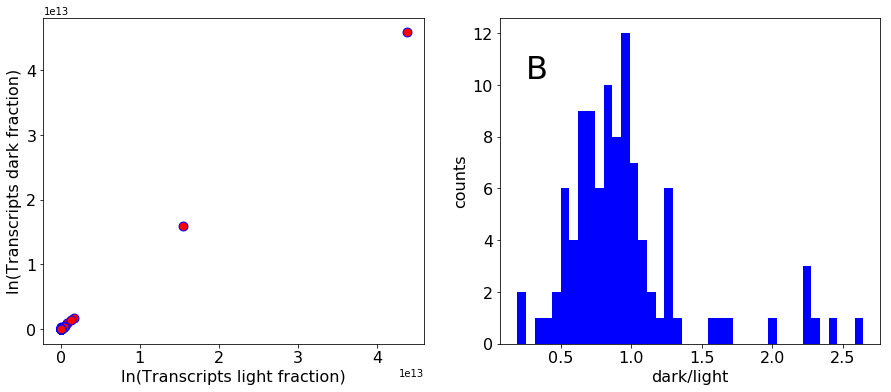

In [9]:
figure(figsize=(15,6))
#plot(range(16,35), range(16,35), 'k',lw=3)
subplot(121)
scatter((piques[piques.columns[6]]),(piques[piques.columns[4]]), 
        facecolors='r', s=80, edgecolors='b')
xticks(fontsize=16)
yticks(fontsize=16)
xlabel('ln(Transcripts light fraction)', fontsize=16)
ylabel('ln(Transcripts dark fraction)',fontsize=16)
#text(18,32,'A', fontsize=32)

subplot(122)
hist(piques[piques.columns[4]]/piques[piques.columns[6]], 
     bins=40, color='blue')
xlabel('dark/light', fontsize=16)
ylabel('counts', fontsize=16)
xticks(fontsize=16)
yticks(fontsize=16)
text(0.25,10.25,'B', fontsize=32)

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 <a list of 10 Text yticklabel objects>)

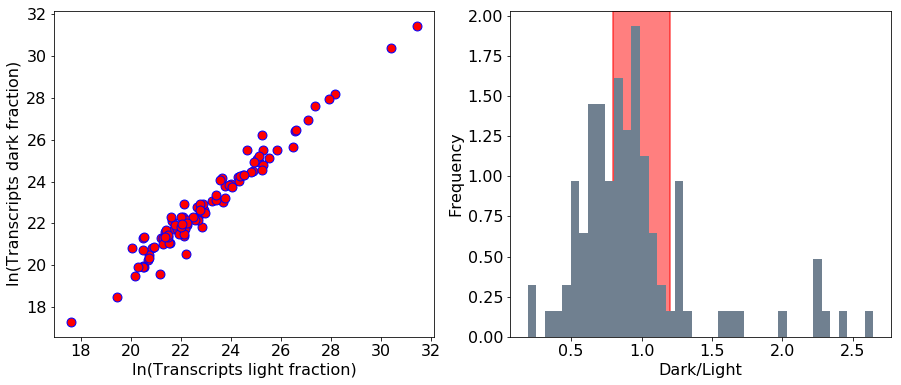

In [10]:
figure(figsize=(15,6))
#plot(range(16,35), range(16,35), 'k',lw=3)
subplot(121)
scatter(log(piques[piques.columns[6]]),log(piques[piques.columns[4]]), 
        facecolors='r', s=80, edgecolors='b')
#text(18,32,'A', fontsize=16)
xticks(fontsize=16)
yticks(fontsize=16)
xlabel('ln(Transcripts light fraction)', fontsize=16)
ylabel('ln(Transcripts dark fraction)',fontsize=16)
#text(18,32,'A', fontsize=32)

subplot(122)
axvspan(0.8,1.2, color='red', lw=2.0, alpha=0.5)

hist(piques[piques.columns[4]]/piques[piques.columns[6]], 
     bins=40, normed=True,color='#708090', edgecolor='none')
xlabel('Dark/Light', fontsize=16)
ylabel('Frequency', fontsize=16)
xticks(fontsize=16)
yticks(fontsize=16)
#text(0.25,10.25,'B', fontsize=32)
#savefig('images/piques_ratio_light_dark.png', format='png', dpi=300)


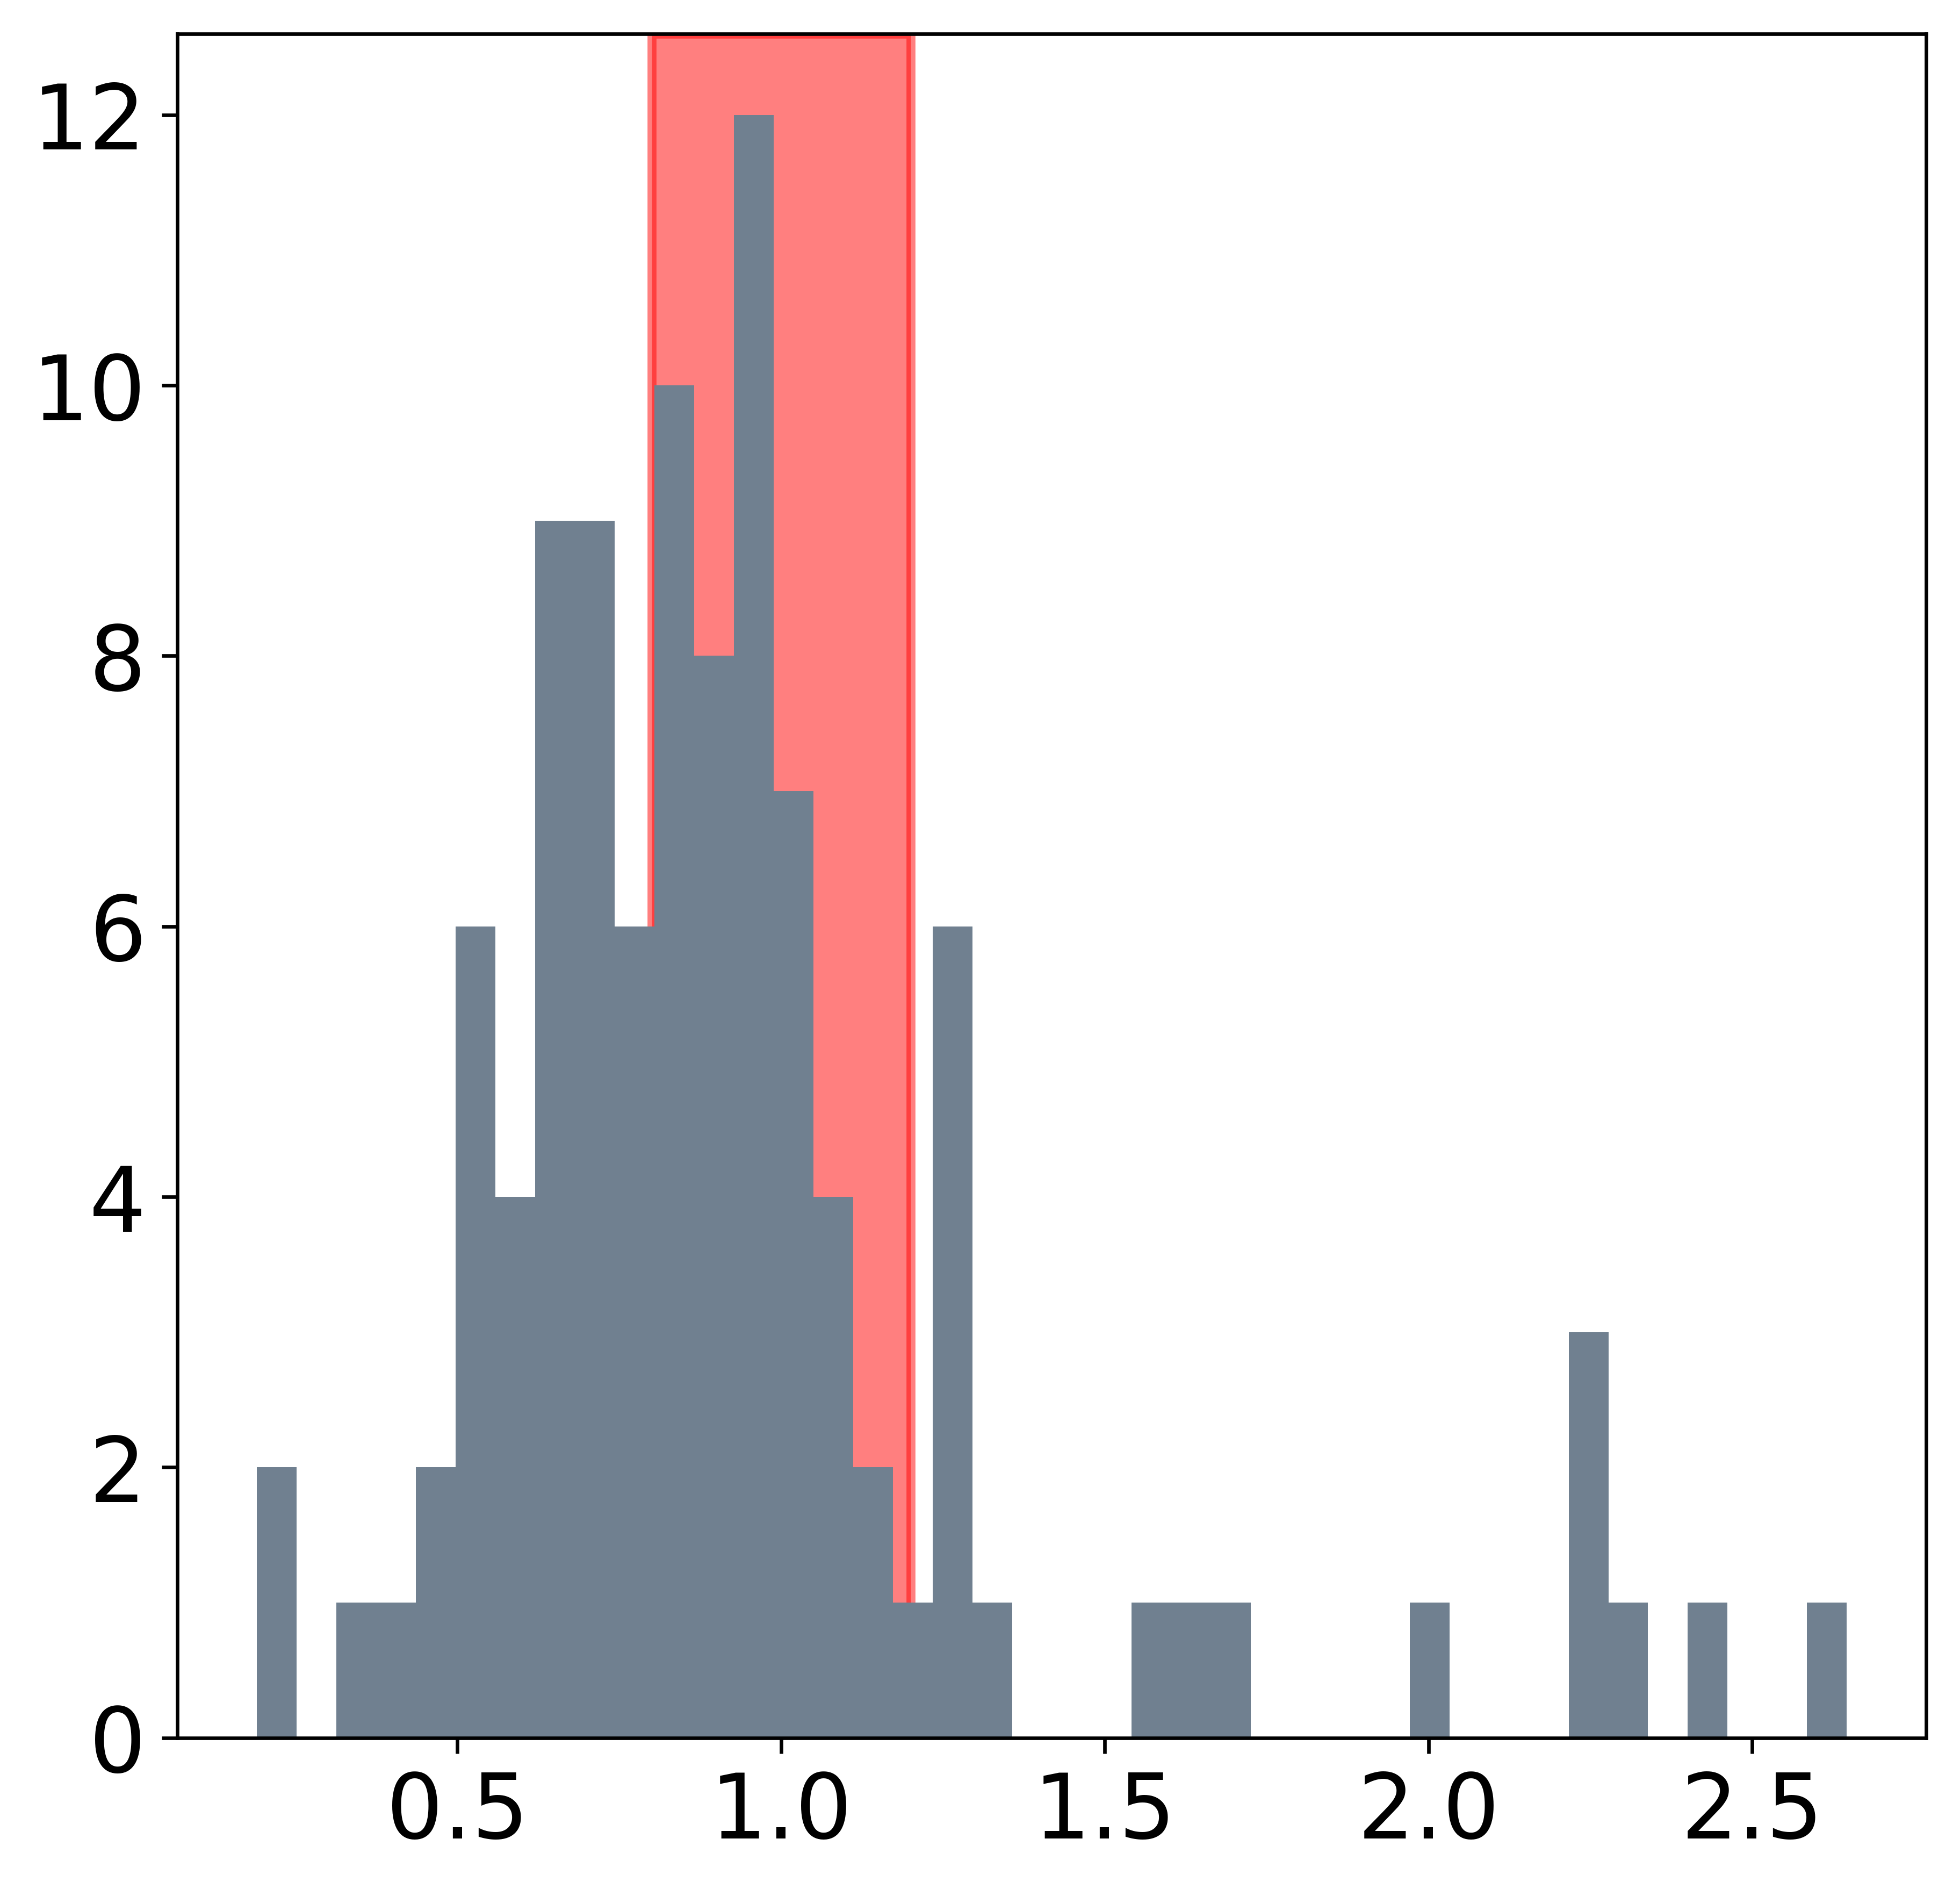

In [11]:
figure(dpi=600, figsize=(7,7))
axvspan(0.8,1.2, color='red', lw=2.0, alpha=0.5)

hist(piques[piques.columns[4]]/piques[piques.columns[6]], 
     bins=40, normed=False,color='#708090', edgecolor='none')
#xlabel('Dark/Light', fontsize=16)
#ylabel('Ocurrence', fontsize=16)
xticks(fontsize=20)
yticks(fontsize=20)
#text(0.25,10.25,'B', fontsize=32)
savefig('piques_ratio_light_dark.svg', format='svg', dpi=600, transparent=True)



Then if we assume that we need genes that do not change that much between conditions we can tray to see which of those are not sifnificaly different from each other

In [20]:
ratios = array(piques[piques.columns[4]]/piques[piques.columns[6]])
below = ratios > 0.8
above = ratios < 1.2
below * above 
a = piques[piques.columns[4]]/piques[piques.columns[6]]
between_09_11=list(i for (i, (x, y)) in enumerate(zip(below* above, a)) if x )

In [21]:
stable_piques = array(piques[piques.columns[1]][between_09_11])
print stable_piques
print stable_piques.size

[u'AT5G19220' u'AT2G47510' u'AT1G51720' u'AT5G04140' u'AT4G31990'
 u'AT3G54050' u'AT1G66430' u'AT1G80380' u'AT5G35630' u'AT1G12240'
 u'AT1G04410' u'AT5G09660' u'AT5G11670' u'AT1G79750' u'AT2G13560'
 u'AT1G12900' u'AT1G42970' u'AT3G26650' u'AT2G42600' u'AT3G12780'
 u'AT4G29220' u'AT3G22960' u'AT5G52920' u'AT5G08300' u'AT4G10120'
 u'AT3G06350' u'AT3G60750' u'AT2G21170' u'AT5G17310' u'AT1G67090'
 u'AT2G39730' u'AT1G29930' u'AT1G29920' u'AT1G20620' u'AT1G26630'
 u'AT5G08290' u'AT5G44200' u'AT5G11980' u'AT1G13320' u'AT5G25760'
 u'AT2G01010; AT3G41768' u'ATCG00920; ATCG01210' u'ATMG01390']
43


# Sidaway data

In [22]:
sidaway = pd.read_excel('13059_2013_3240_MOESM2_ESM.xls', sheetname=0) 
sidaway.head()

,Array Element,Locus Identifier,Annotation,Mean half life (hours) 17°C,Standard deviation for half life 17°C,Mean transcription rate (array units per hour) 17°C,Standard deviation for transcription rate 17°C,Mean half life (hours) 27°C,Standard deviation for half life 27°C,Mean transcription rate (array units per hour) 27°C,Standard deviation for transcription rate 27°C,Decay rate Q10,Transcription rate Q10,Abundance at end of labelling 27°C/17°C,t-test result for abundance at 27°C compared to 17°C
0,244903_at,ATMG00660,hypothetical protein,1.613251,1.485423,11.898718,4.201686,2.727626,0.946611,66.274677,19.169850,0.591449,5.569901,1.852350,0.161252
1,244912_at,AT2G07783;ATMG00830,"[AT2G07783, pseudogene, similar to Ccl1, blast...",4.446394,3.210329,16.161407,1.865891,1.666957,0.841133,39.283733,10.955103,2.667372,2.430712,0.483861,0.025574
2,244920_s_at,AT2G07751;ATMG00990,"[AT2G07751, NADH-ubiquinone oxidoreductase cha...",2.223856,2.009844,13.924459,4.190036,3.548583,3.234226,59.535838,31.140516,0.626688,4.275630,0.963145,0.679873
3,244921_s_at,ATMG01000,hypothetical protein,5.517473,4.719231,11.436073,0.185824,1.054674,0.357031,50.074104,19.330679,5.231449,4.378610,1.117944,0.557267
4,244935_at,ATCG01090,Encodes subunit of the chloroplast NAD(P)H deh...,8.542006,5.552662,471.162367,113.084495,9.735872,9.569306,1483.074984,282.578873,0.877374,3.147694,0.822264,0.147185


# Experimental conditions Sidaway

Arabidopsis plants, ecotype Columbia, were grown in cycles of 12 hours 80 μmol white light, 12 hours dark. Eleven-day-old seedlings were removed from MS (Murashige and Skoog, Melfords, Ipswich, Suffolk, UK) agar plates and allowed to acclimatize overnight to floating in liquid MS media. They were then labeled by adding 4SU (Carbosynth Compton, Berkshire, UK) to the liquid MS media 10 minutes after dawn. The concentrations added were different for different labeling times and temperatures and optimal concentrations for each set of conditions were determined experimentally using dot blots (see below for method) visualized using streptavidin-HRP (Genscript Piscataway, NJ, USA) to check the levels of 4SU in the RNA. Plant samples were removed from the liquid medium and flash frozen in liquid nitrogen.

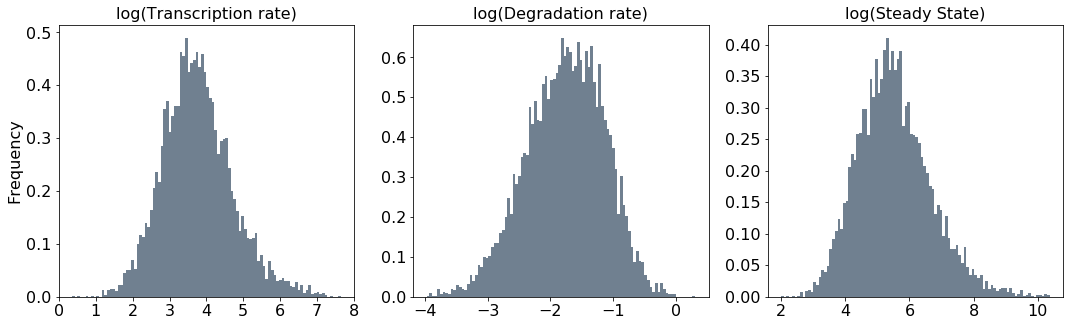

In [23]:
figure(figsize=(18,5))
subplot(131)
hist(log(sidaway[sidaway.columns[5]]),bins=100,color='#708090', edgecolor='none', normed=True)
#text(-4,300,'A',fontsize=32)
title('log(Transcription rate)', fontsize=16)
xticks(fontsize=16)
yticks(fontsize=16)

ylabel('Frequency', fontsize=16)
subplot(132)
hist(log(log(2)/sidaway[sidaway.columns[3]]),bins=100,color='#708090', edgecolor='none', normed=True)
#text(-0.5,210,'B',fontsize=32)
title('log(Degradation rate)', fontsize=16)
xticks(range(-4,1,1),fontsize=16)
yticks(fontsize=16)


subplot(133)
hist(log(sidaway[sidaway.columns[5]]/(log(2)/sidaway[sidaway.columns[3]])),
     bins=100,color='#708090', edgecolor='none', normed=True)
#text(-6,290,'C',fontsize=32)
title('log(Steady State)', fontsize=16)
xticks(fontsize=16)
yticks(fontsize=16)


savefig('sidaway_lee_distributions.svg',format='svg',dpi=600, transparent=True)

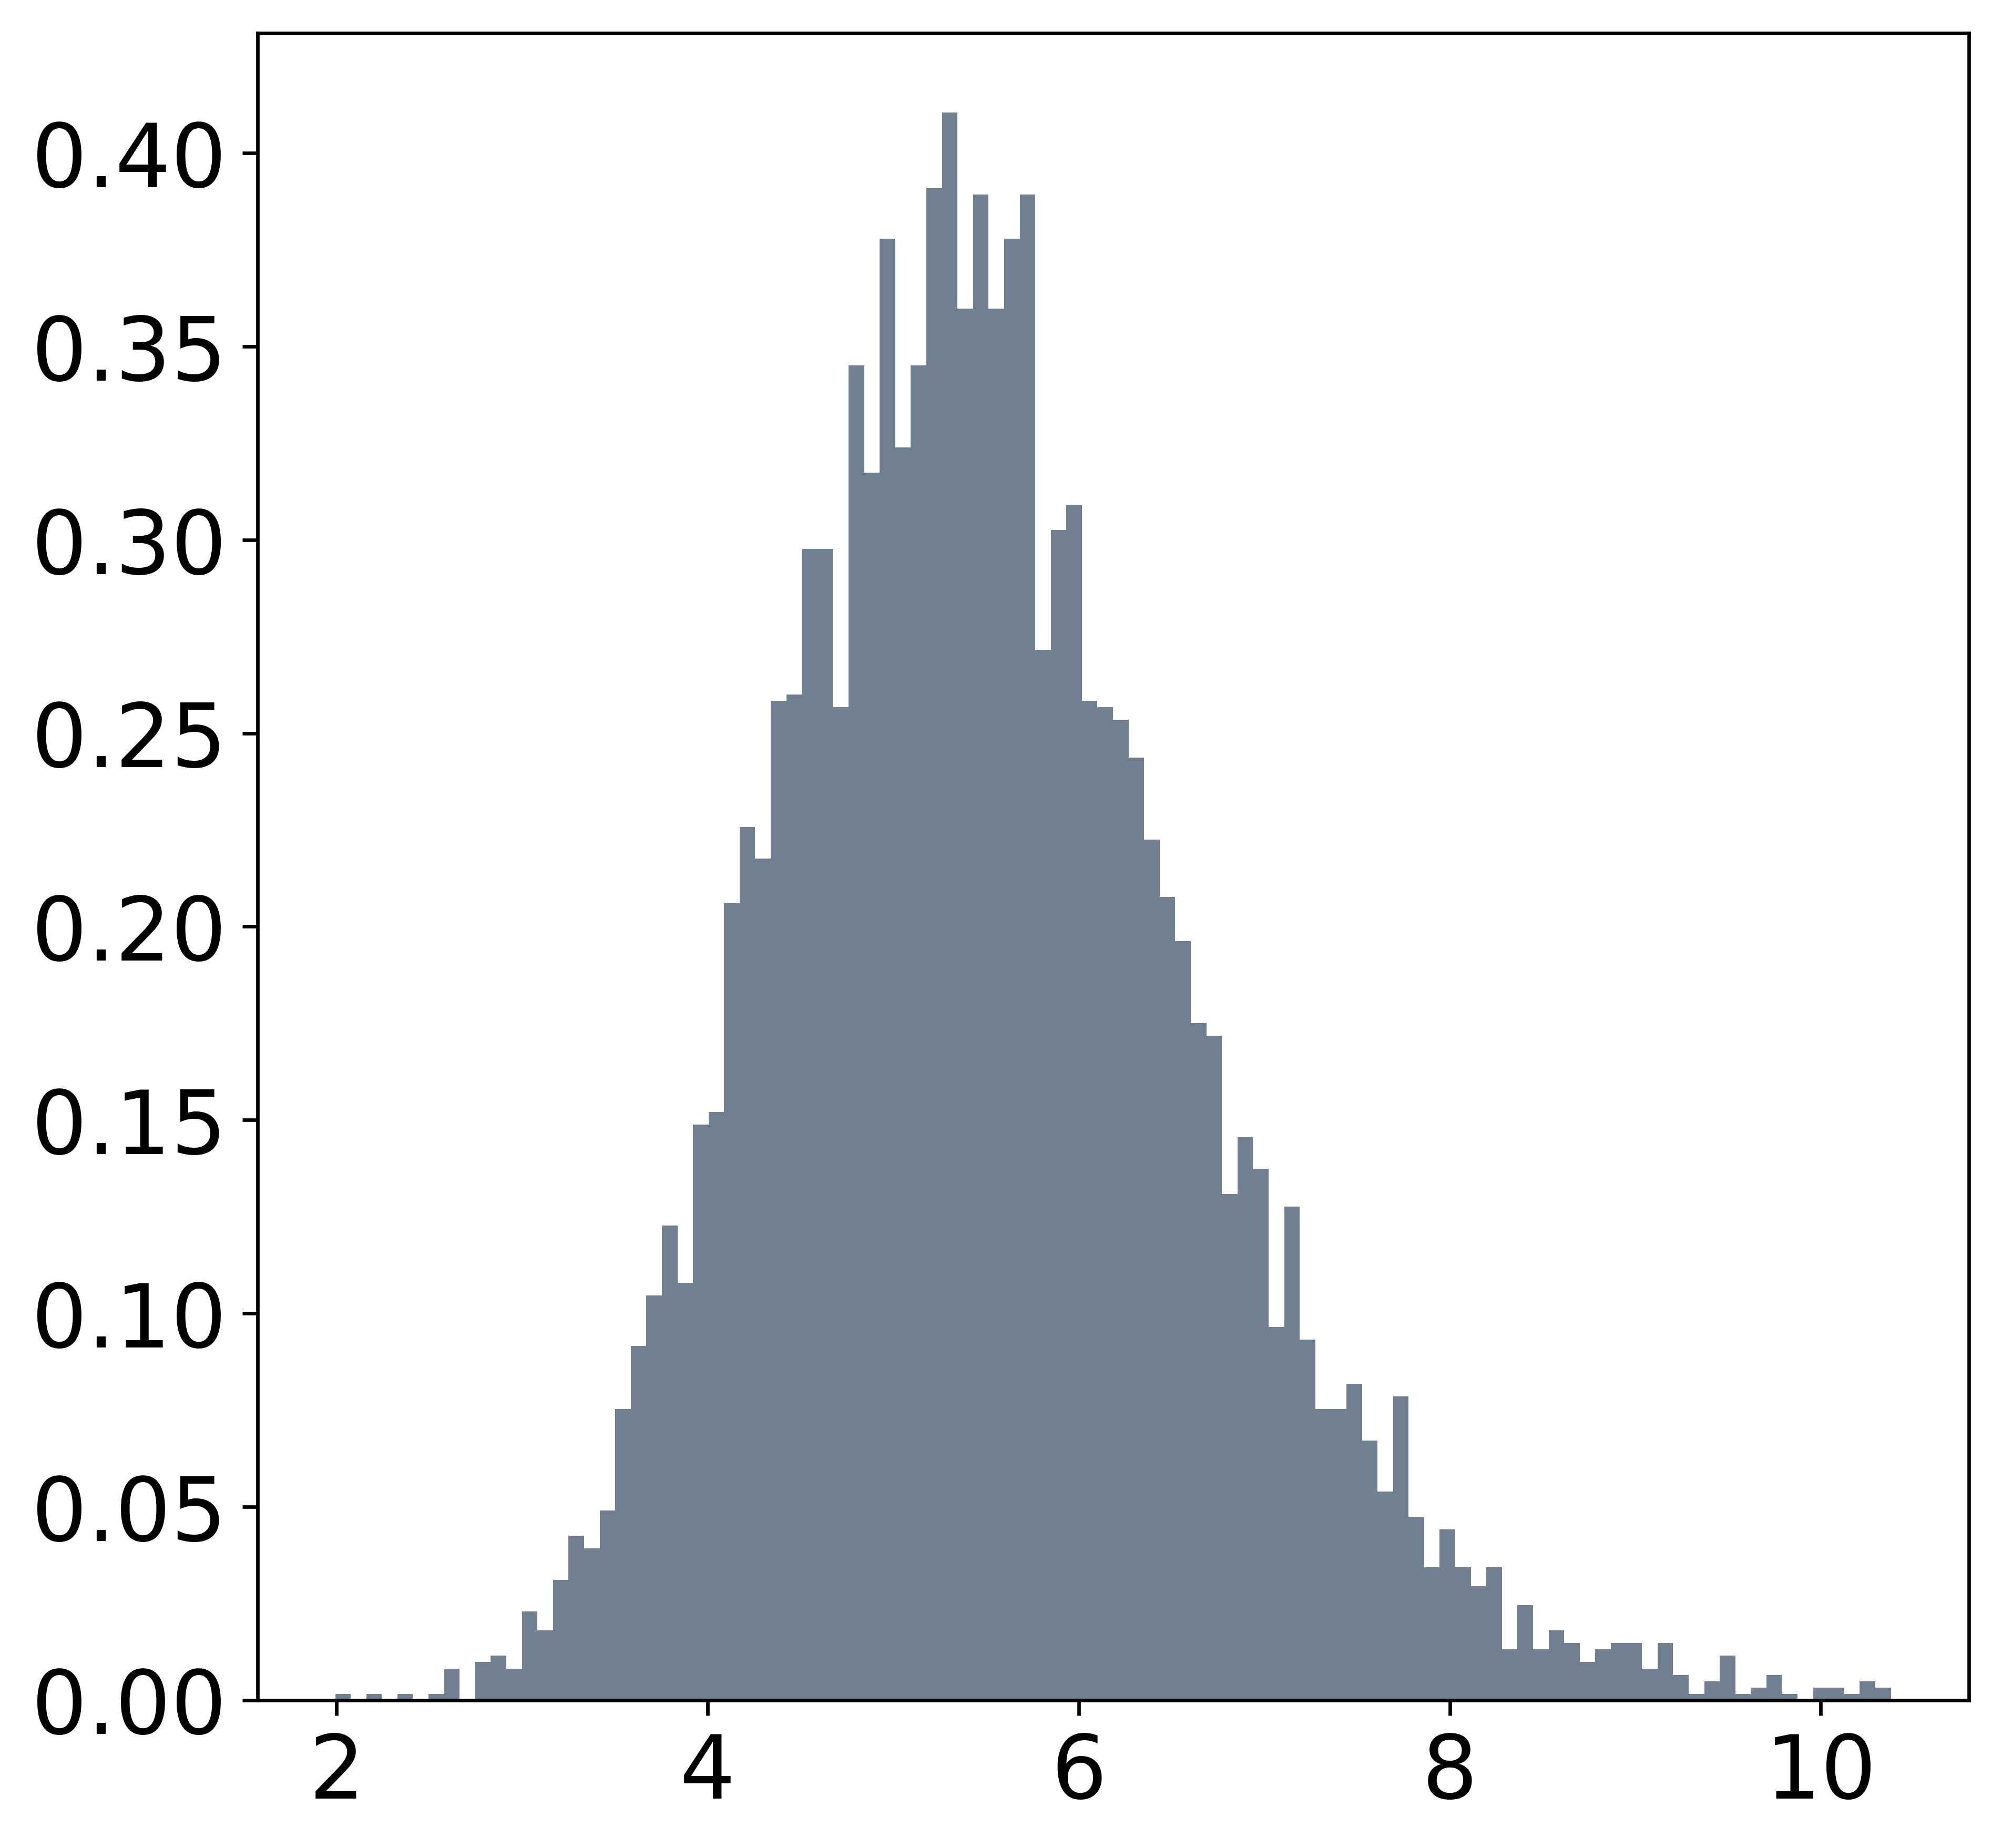

In [24]:
figure(dpi=600, figsize=(7,7))
hist(log(sidaway[sidaway.columns[5]]/(log(2)/sidaway[sidaway.columns[3]])),
     bins=100,color='#708090', edgecolor='none', normed=True)
#text(-6,290,'C',fontsize=32)
#title('log(Steady State)', fontsize=16)
xticks(fontsize=20)
yticks(fontsize=20)
savefig('sidaway_lee_distributions.svg',format='svg',dpi=600, transparent=True)

We know that in steady state we obtain panel c

In [25]:
norm.fit(log(log(2)/sidaway[sidaway.columns[3]]))

(-1.7665059947812463, 0.6212109515733285)

In [26]:
from IPython.display import display, Math, Latex

In [27]:
display(Math(r'\frac{dT}{dt}=\beta-\alpha T'))
display(Math(r'T=\frac{\beta}{\alpha}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We know that Sidaway data has units in Microarray units/time. But we want to change the units that we have into copies per gFw that piques reports

In [28]:
sidaway_index_list = []
piques_index_list = []


for j in range(0,len(stable_piques)):
    for i in range(0,len(sidaway)):
        if sidaway.iloc[i][1] == stable_piques[j]:
            sidaway_index_list.append(i)
            piques_index_list.append(j)
    
    

In [29]:
sidaway_steady_state_17C = []
sidaway_steady_state_17C_sd = []
sidaway_steady_state_27C = []
sidaway_steady_state_27C_sd = []
for i in sidaway_index_list:
    sidaway_steady_state_17C.append(sidaway.iloc[i][5]/sidaway.iloc[i][3])
    sidaway_steady_state_17C_sd.append(sidaway.iloc[i][6]/sidaway.iloc[i][3])
    sidaway_steady_state_27C.append(sidaway.iloc[i][9]/sidaway.iloc[i][7])


In [30]:
piques_steady_state = []
piques_steady_state_sd = []
for i in piques_index_list:
    piques_steady_state.append(piques.iloc[between_09_11[i]][4])
    

In [31]:
array(piques_steady_state)/25e6

array([  43.6026528 ,  312.43009788, 1325.59930048,  107.52115784,
         71.0947462 ,  357.88178308,   82.85984596,   46.41737044,
         75.65714076])

In [32]:

m17,b17, r17, p17, st17 = linregress(log(array(piques_steady_state)/25e6),log(sidaway_steady_state_17C))
m27,b27, r27, p27, st27 = linregress(log(array(piques_steady_state)/25e6),log(sidaway_steady_state_27C))

In [33]:

m17,b17, r17, p17, st17 = linregress(log(sidaway_steady_state_17C),log(array(piques_steady_state)/25e6))
m27,b27, r27, p27, st27 = linregress(log(sidaway_steady_state_27C),log(array(piques_steady_state)/25e6))

In [34]:
x= linspace(min(log(array(piques_steady_state)/25e6)),max(log(array(piques_steady_state)/25e6)),10)

In [35]:
!pip install sklearn

    100% |################################| 5.5MB 170kB/s ta 0:00:011
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


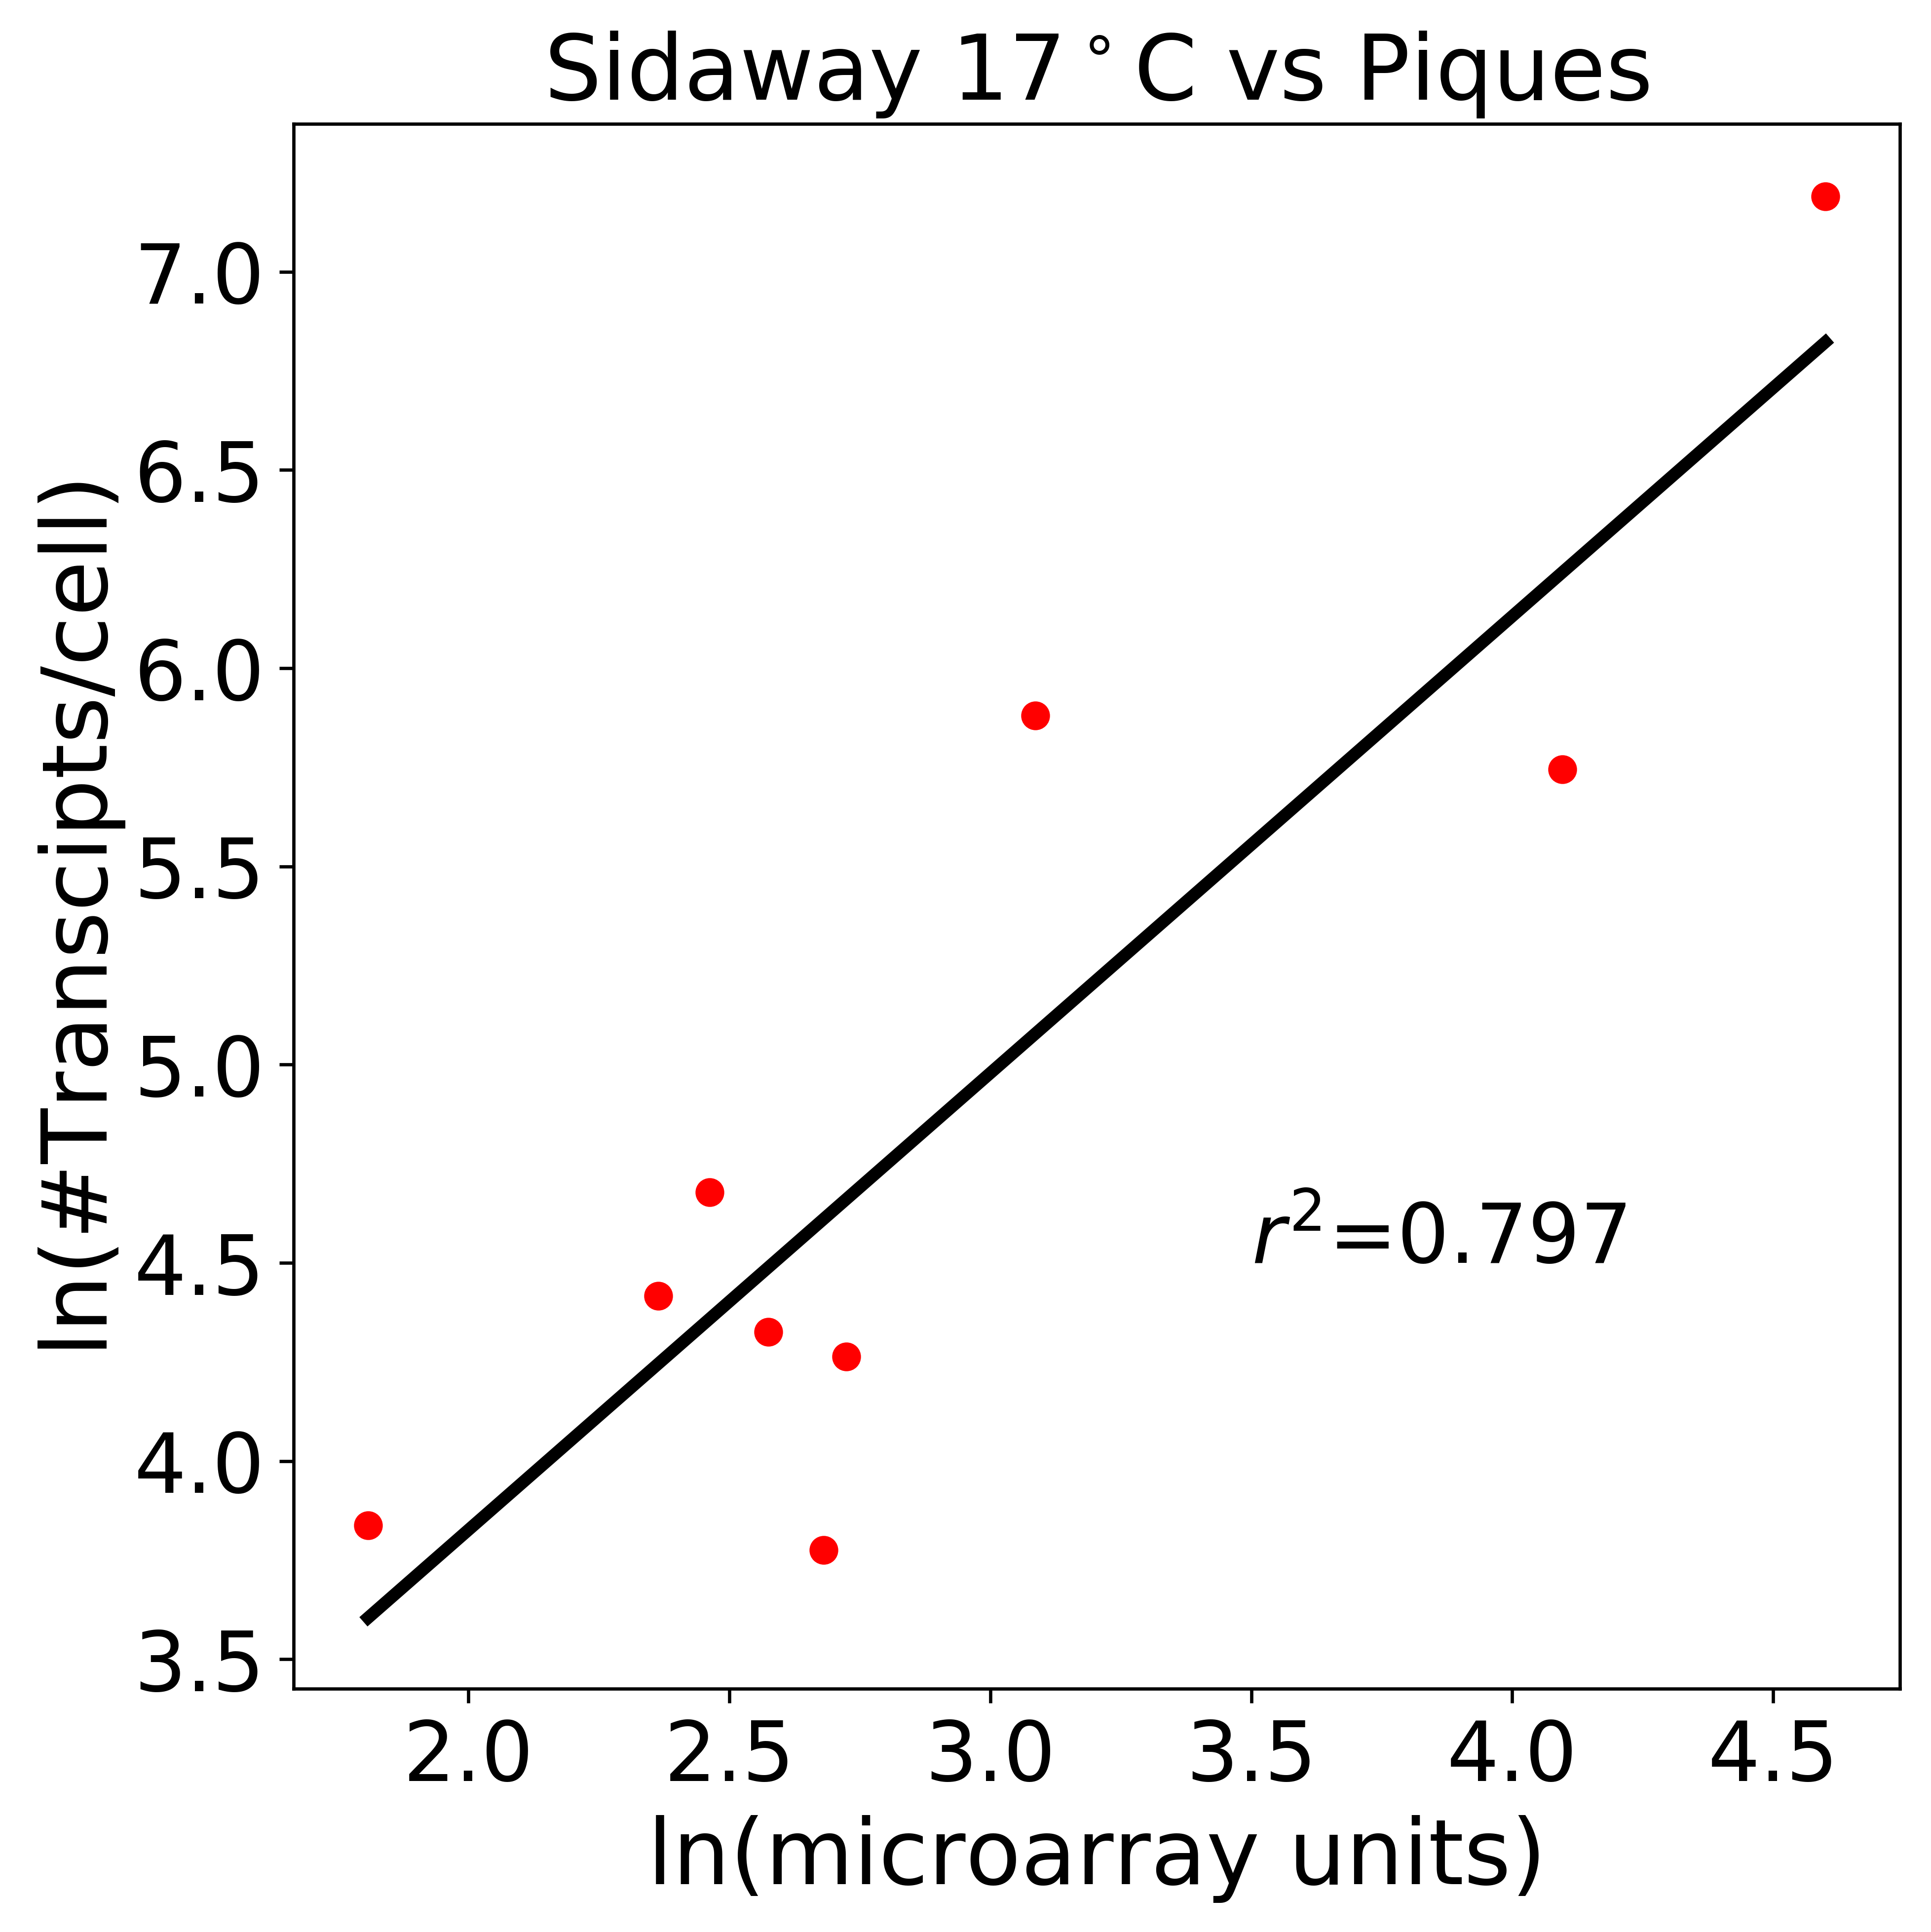

In [36]:
from sklearn.metrics import mean_squared_error

x= linspace(min(log(sidaway_steady_state_17C)),max(log(sidaway_steady_state_17C)),10)
figure(dpi=600, figsize=(7,7))
plot(x,m17*x+b17, lw=3, color='k')
scatter(log(sidaway_steady_state_17C),log(array(piques_steady_state)/25e6),color='r')
text(3.5,4.5,'$r^2$='+str(round(r17**2,3)), fontsize=20)
ylabel("ln(#Transcipts/cell)",fontsize=22)
xticks(fontsize=20)
yticks(fontsize=20)
xlabel("ln(microarray units)", fontsize=22)
title("Sidaway 17$^\circ$C vs Piques", fontsize=22)

savefig('sidaway_vs_piques_regression_17C.svg', format='svg', dpi=600, transparent=True)

0.7082182671113864


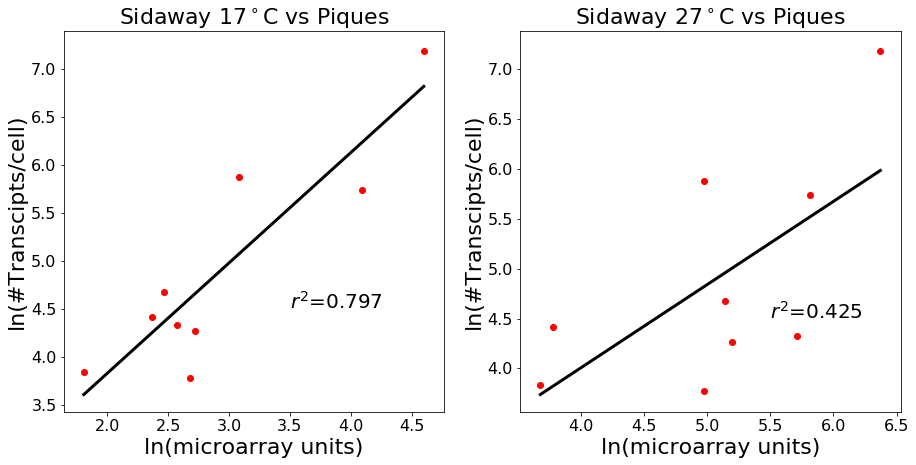

In [37]:
from sklearn.metrics import mean_squared_error

x= linspace(min(log(sidaway_steady_state_17C)),max(log(sidaway_steady_state_17C)),10)
figure(figsize=(15,7))
subplot(121)
plot(x,m17*x+b17, lw=3, color='k')
scatter(log(sidaway_steady_state_17C),log(array(piques_steady_state)/25e6),color='r')
text(3.5,4.5,'$r^2$='+str(round(r17**2,3)), fontsize=20)
ylabel("ln(#Transcipts/cell)",fontsize=22)
xticks(fontsize=16)
yticks(fontsize=16)
xlabel("ln(microarray units)", fontsize=22)
title("Sidaway 17$^\circ$C vs Piques", fontsize=22)
subplot(122)
x= linspace(min(log(sidaway_steady_state_27C)),max(log(sidaway_steady_state_27C)),10)
plot(x,m27*x+b27, lw=3, color='k')
text(5.5,4.5,'$r^2$='+str(round(r27**2,3)), fontsize=20)
scatter(log(sidaway_steady_state_27C),log(array(piques_steady_state)/25e6),color='r')
print mean_squared_error(log(array(piques_steady_state)/25e6),log(sidaway_steady_state_27C))
title("Sidaway 27$^\circ$C vs Piques", fontsize=22)
ylabel("ln(#Transcipts/cell)",fontsize=22)
xlabel("ln(microarray units)", fontsize=22)
xticks(fontsize=16)
yticks(fontsize=16)

savefig('sidaway_vs_piques.svg', format='svg', dpi=600, transparent=True)

In [38]:
rates = []
for i in range(0,len(sidaway.iloc[:,3])):
    rates.append(log(2)/sidaway.iloc[i,3]*(exp((log(m17*sidaway.iloc[i,5])+b17))))


3.655971216562866 1.1305016860774317


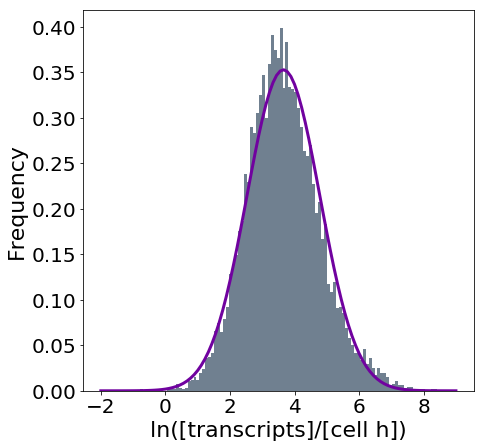

In [39]:
figure(figsize=(7,7))
mu,std = norm.fit(array(log(rates)))
x = np.linspace(-2, 9, 100)
p = norm.pdf(x, mu, std)
plot(x,p, lw=3, label='Fitted normal', color="#70029F")
yticks(fontsize=20)
xticks(fontsize=20)
hist(log(rates),bins=100, normed=True, color='#708090', edgecolor='none')
#legend(loc='upper right', fontsize=16)
ylabel("Frequency", fontsize=22)
xlabel("ln([transcripts]/[cell h])", fontsize=22)
savefig('calibrated_microarray.png', format='png', dpi=300)
print mu, std
savefig('calibirated_sidawaylee.svg', format='svg', dpi=600, transparent=True)

3.655971216562866 1.1305016860774317


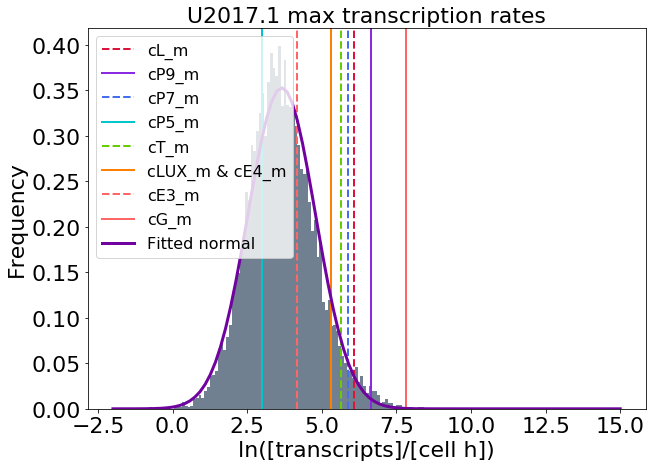

In [55]:
figure(figsize=(10,7))

U21017_1_rates = {}
U21017_1_rates['cL_m'] = log((pU2017_1.getByKey('q1')+pU2017_1.getByKey('n1'))*sfU2017_1.getByKey('gml'))
U21017_1_rates['cP9_m'] = log((pU2017_1.getByKey('n7')+pU2017_1.getByKey('n4')+pU2017_1.getByKey('q3'))*sfU2017_1.getByKey('gm9'))
U21017_1_rates['cP7_m'] = log(((pU2017_1.getByKey('n8')+pU2017_1.getByKey('n9'))*sfU2017_1.getByKey('gm7')))
U21017_1_rates['cP5_m'] = log((pU2017_1.getByKey('n10')+pU2017_1.getByKey('n11'))*sfU2017_1.getByKey('gm5'))
U21017_1_rates['cT_m'] = log((pU2017_1.getByKey('n2'))*sfU2017_1.getByKey('gmt'))
U21017_1_rates['cLUX_m'] = log((pU2017_1.getByKey('n13'))*sfU2017_1.getByKey('gm4'))
U21017_1_rates['cE4_m'] = log((pU2017_1.getByKey('n13'))*sfU2017_1.getByKey('gm4'))
U21017_1_rates['cE3_m'] = log((pU2017_1.getByKey('n3'))*sfU2017_1.getByKey('gm3'))
U21017_1_rates['cG_m'] = log((pU2017_1.getByKey('n12')+pU2017_1.getByKey('q2'))*sfU2017_1.getByKey('gmg'))



axvline(log((pU2017_1.getByKey('q1')+pU2017_1.getByKey('n1'))*sfU2017_1.getByKey('gml')), color='#DC143C', label='cL_m', linestyle='--')
axvline(log((pU2017_1.getByKey('n7')+pU2017_1.getByKey('n4')+pU2017_1.getByKey('q3'))*sfU2017_1.getByKey('gm9')), color='#8A2BE2', label='cP9_m')
axvline(log((pU2017_1.getByKey('n8')+pU2017_1.getByKey('n9'))*sfU2017_1.getByKey('gm7')), color='#436EEE', label='cP7_m', linestyle='--')
axvline(log((pU2017_1.getByKey('n10')+pU2017_1.getByKey('n11'))*sfU2017_1.getByKey('gm5')), color='#00C5CD', label='cP5_m')
axvline(log((pU2017_1.getByKey('n2'))*sfU2017_1.getByKey('gmt')), color='#66CD00', label='cT_m', linestyle='--')

axvline(log((pU2017_1.getByKey('n13'))*sfU2017_1.getByKey('gm4')), color='#FF7F00', label='cLUX_m & cE4_m')
axvline(log((pU2017_1.getByKey('n3'))*sfU2017_1.getByKey('gm3')), color='#ff6666', label='cE3_m', linestyle='--')
axvline(log((pU2017_1.getByKey('n12')+pU2017_1.getByKey('q2'))*sfU2017_1.getByKey('gmg')), color='#ff6666', label='cG_m')


title('U2017.1 max transcription rates', fontsize=22)
mu,std = norm.fit(array(log(rates)))
x = np.linspace(-2, 15, 100)
p = norm.pdf(x, mu, std)
plot(x,p, lw=3, label='Fitted normal', color="#70029F")
yticks(fontsize=22)
xticks(fontsize=22)
hist(log(rates),bins=100, normed=True, color='#708090', edgecolor='none')
legend(loc='upper left', fontsize=16)
ylabel("Frequency", fontsize=22)
xlabel("ln([transcripts]/[cell h])", fontsize=22)
savefig('calibrated_microarray_U2017.1.svg', format='svg', dpi=600, transparent=True)
print mu, std

3.655971216562866 1.1305016860774317


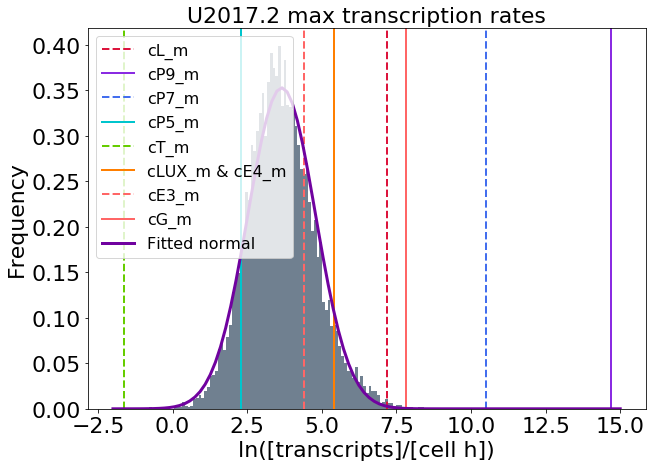

In [56]:
figure(figsize=(10,7))

U21017_2_rates = {}
U21017_2_rates['cL_m'] = log((pU2017_2.getByKey('q1')+pU2017_2.getByKey('n1'))*sfU2017_2.getByKey('gml'))
U21017_2_rates['cP9_m'] = log((pU2017_2.getByKey('nt1')*pU2017_2.getByKey('at1')+pU2017_2.getByKey('q3t'))*sfU2017_2.getByKey('gm9'))
U21017_2_rates['cP7_m'] = log((pU2017_2.getByKey('nt2')*sfU2017_2.getByKey('gm7')))
U21017_2_rates['cP5_m'] = log((pU2017_2.getByKey('nt3')*pU2017_2.getByKey('at2'))*sfU2017_2.getByKey('gm5'))
U21017_2_rates['cT_m'] = log((pU2017_2.getByKey('nt4')*pU2017_2.getByKey('at3'))*sfU2017_2.getByKey('gmt'))
U21017_2_rates['cLUX_m'] = log((pU2017_2.getByKey('n13'))*sfU2017_2.getByKey('gm4'))
U21017_2_rates['cE4_m'] = log((pU2017_2.getByKey('n13'))*sfU2017_2.getByKey('gm4'))
U21017_2_rates['cE3_m'] = log((pU2017_2.getByKey('n3'))*sfU2017_2.getByKey('gm3'))
U21017_2_rates['cG_m'] = log((pU2017_2.getByKey('n12')+pU2017_2.getByKey('q2'))*sfU2017_2.getByKey('gmg'))



axvline(U21017_2_rates['cL_m'], color='#DC143C', label='cL_m', linestyle='--')
axvline(U21017_2_rates['cP9_m'], color='#8A2BE2', label='cP9_m')
axvline(U21017_2_rates['cP7_m'], color='#436EEE', label='cP7_m', linestyle='--')
axvline(U21017_2_rates['cP5_m'], color='#00C5CD', label='cP5_m')
axvline(U21017_2_rates['cT_m'], color='#66CD00', label='cT_m', linestyle='--')

axvline(U21017_2_rates['cLUX_m'] , color='#FF7F00', label='cLUX_m & cE4_m')
axvline(U21017_2_rates['cE3_m'], color='#ff6666', label='cE3_m', linestyle='--')
axvline(U21017_2_rates['cG_m'], color='#ff6666', label='cG_m')


title('U2017.2 max transcription rates', fontsize=22)
mu,std = norm.fit(array(log(rates)))
x = np.linspace(-2, 15, 100)
p = norm.pdf(x, mu, std)
plot(x,p, lw=3, label='Fitted normal', color="#70029F")
yticks(fontsize=22)
xticks(fontsize=22)
hist(log(rates),bins=100, normed=True, color='#708090', edgecolor='none')
legend(loc='upper left', fontsize=16)
ylabel("Frequency", fontsize=22)
xlabel("ln([transcripts]/[cell h])", fontsize=22)
savefig('calibrated_microarray_U2017.2.svg', format='svg', dpi=600, transparent=True)
print mu, std